# Inference plots - Trace plots

This example builds on [adaptive covariance MCMC](https://pints.readthedocs.io/en/latest/mcmc_samplers/adaptive_covariance_mc.html), and shows you how to plot the MCMC chain traces.

Inference plots:
* [Predicted time series](mcmc-predicted-time-series.ipynb)
* [Autocorrelation](mcmc-autocorrelation.ipynb)
* [Pairwise scatterplots](mcmc-pairwise-scatterplots.ipynb)

## Setting up an MCMC routine

See the adaptive covariance MCMC example for details.

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]  # growth rate, carrying capacity
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 50
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Perform sampling using MCMC, with three chains
xs = [
    real_parameters * 1.1,
    real_parameters * 1.15,
    real_parameters * 0.9,
]
mcmc = pints.MCMCController(log_posterior, 3, xs)
mcmc.set_max_iterations(6000)
mcmc.set_log_to_screen(False)

## Traces

The plots below show the chains generated by three independent runs of the adaptive MCMC routine (all from the same starting point). All three chains require an initial period (usually discarded as 'burn-in') before they converge to the same parameter values. These initial samples distort the shape of the histograms seen on the left.

In [2]:
print('Running...')
chains = mcmc.run()
print('Done!')

Running...
Done!


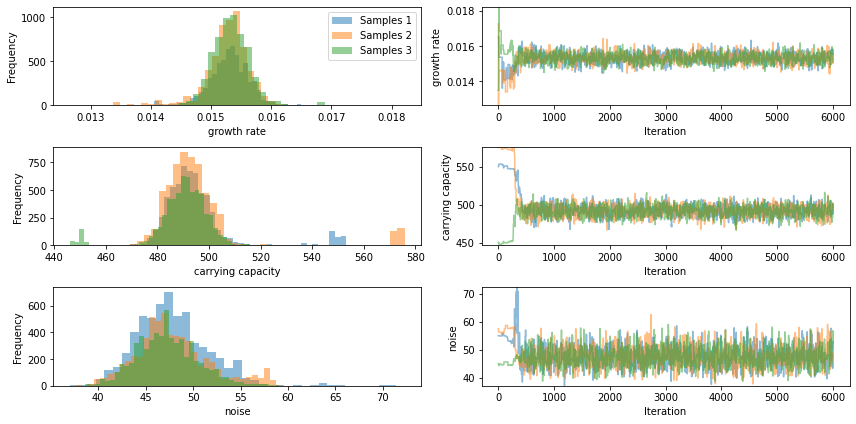

In [3]:
import pints.plot
pints.plot.trace(chains, parameter_names=['growth rate', 'carrying capacity', 'noise'])
plt.show()